# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

In [1]:
import numpy as np
import pandas as pd

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [2]:
# Your code here
boston = pd.read_csv('../data/boston_data.csv')

In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.2 KB


In [4]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.
**Hint:** Use the Seaborn *pairplot* function ([documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html))

In [5]:
# Your plots here
import seaborn as sns

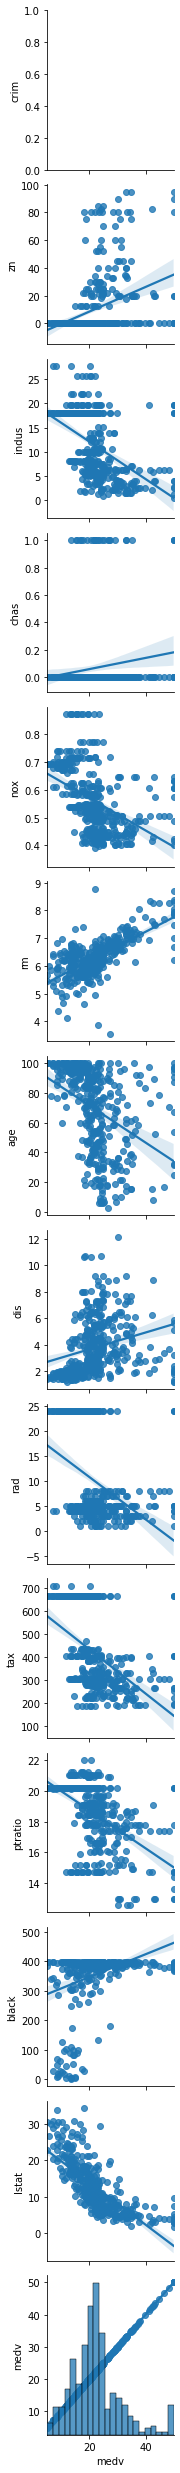

In [6]:
sns.pairplot(boston, x_vars='medv', kind='reg')


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [7]:
# Your response here
#some varaibles seem to be high correlated and some don't

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

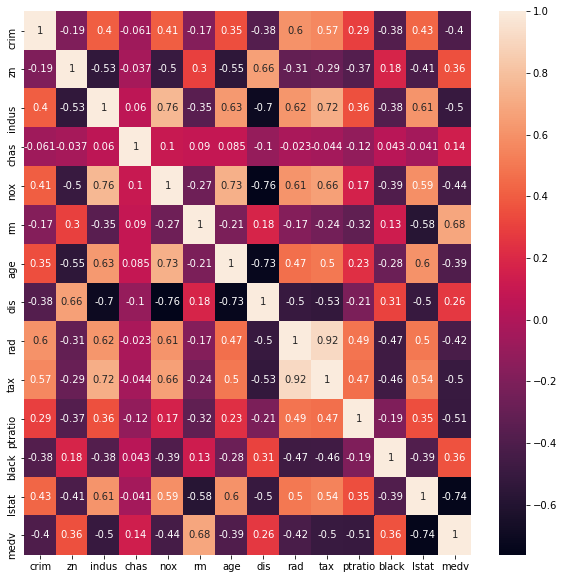

In [8]:
# Your response here
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
sns.heatmap(boston.corr(), annot=True)
plt.show()

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.
**Hint:** Use the Pandas *series.describe* method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html))

In [9]:
# Your code here
boston['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [10]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test (include a *random_state* parameter, see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [11]:
# Your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.iloc[:,0:-2], boston.iloc[:,-1:], train_size=0.8) 

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [13]:
# Five separate RFR here with the given max depths

rfr = GridSearchCV(estimator = RandomForestRegressor(),
                   param_grid={"max_depth":[2, 4, 6, 8, 10]},
                   scoring='r2',
                   cv=5
                   )
rfr.fit(X_train, y_train)

C:\Users\Filipe Miguel Santos\anaconda3\envs\main\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Filipe Miguel Santos\anaconda3\envs\main\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Filipe Miguel Santos\anaconda3\envs\main\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Filipe Miguel Santos\anaconda3\envs\main\lib\s

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10]}, scoring='r2')

Now, plot the score for each tree on the training set and on the testing set.

In [14]:
# Produce a plot with the score for the testing and training for the different max depths
results = rfr.cv_results_
results_df = pd.DataFrame(results)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.197769,0.021579,0.012802,0.001718,2,{'max_depth': 2},0.729068,0.515610,0.739262,0.664086,0.568524,0.643310,0.088196,5
1,0.263959,0.020206,0.015397,0.004542,4,{'max_depth': 4},0.775883,0.635511,0.757984,0.689159,0.669135,0.705534,0.053285,4
2,0.285448,0.052183,0.014511,0.002275,6,{'max_depth': 6},0.849098,0.629823,0.751546,0.708655,0.705681,0.728961,0.071730,3
3,0.324549,0.061519,0.018598,0.006248,8,{'max_depth': 8},0.845876,0.647426,0.754538,0.674045,0.735338,0.731445,0.069277,2
4,0.340746,0.055378,0.016198,0.004874,10,{'max_depth': 10},0.868831,0.674870,0.754691,0.726129,0.717599,0.748424,0.065414,1


<AxesSubplot:xlabel='param_max_depth', ylabel='mean_test_score'>

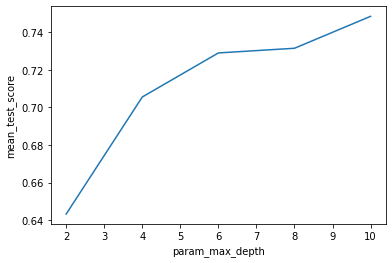

In [15]:
sns.lineplot(x=results_df['param_max_depth'], y=results_df['mean_test_score'])

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [16]:
# Your response here
#the test score grows as the depth of the tree, however, after a certain point, it stabilizes and does not grow significantly.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [17]:
# Your response here
#High bias for max depth 1 and high variance for max depth 10

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [18]:
# Your response here
rfr.best_estimator_

RandomForestRegressor(max_depth=10)

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [19]:
# Your response here
# How relevant today is data that was collected from 1978? - Not much since times change.
# Are the features present in the data sufficient to describe a home? - It might exist a lot more factors
# Is the model robust enough to make consistent predictions? - Don't think so.
# Would data collected in an urban city like Boston be applicable in a rural city? - No. The location may have a big influence.